In [2]:
from ultralytics import YOLO
import os
from matplotlib import pyplot as plt
import numpy as np
import torch

In [11]:

# Create a new YOLO model from scratch

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8l.pt')

# model = torch.hub.load('ultralytics/yolov8', 'custom', path='yolov8l.pt', source='local')


In [89]:
# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data='coco128.yaml', epochs=3)



Ultralytics YOLOv8.0.213 🚀 Python-3.11.3 torch-2.1.1 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

train: Scanning /Users/shehvincent/Documents/IoT/Motorcycle Detection/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
val: Scanning /Users/shehvincent/Documents/IoT/Motorcycle Detection/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train9
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.8276     0.7285      1.116        201        640: 100%|██████████| 8/8 [06:37<00:00, 49.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:00<00:00, 30.06s/it]

                   all        128        929       0.74       0.78       0.84      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G     0.9316     0.7827      1.167        136        640: 100%|██████████| 8/8 [07:24<00:00, 55.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [02:12<00:00, 33.22s/it]

                   all        128        929      0.846      0.757      0.858      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/8 [00:23<?, ?it/s]


KeyboardInterrupt: 

In [90]:
# Evaluate the model's performance on the validation set

# Perform object detection on an image using the model
results = model('https://ultralytics.com/images/bus.jpg',save=True, classes = 3)

# Export the model to ONNX format
# success = model.export(format='onnx')



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /Users/shehvincent/Documents/IoT/Motorcycle Detection/bus.jpg: 640x480 (no detections), 456.2ms
Speed: 13.9ms preprocess, 456.2ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [10]:
inference_images = [os.path.join('./Test',img) for img in os.listdir('./Test') if ('.jpg' in img) or ('.png' in img)]
results = model(inference_images,save=True,  conf=0.4, classes = 3)

    



0: 640x640 (no detections), 1: 640x640 (no detections), 2: 640x640 (no detections), 3: 640x640 (no detections), 4: 640x640 (no detections), 5: 640x640 (no detections), 6: 640x640 (no detections), 7: 640x640 (no detections), 8: 640x640 (no detections), 9: 640x640 (no detections), 10: 640x640 (no detections), 11: 640x640 (no detections), 12: 640x640 (no detections), 13: 640x640 (no detections), 14: 640x640 (no detections), 15: 640x640 (no detections), 16: 640x640 (no detections), 17545.6ms
Speed: 2.2ms preprocess, 1032.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict12


# Illegal Parking

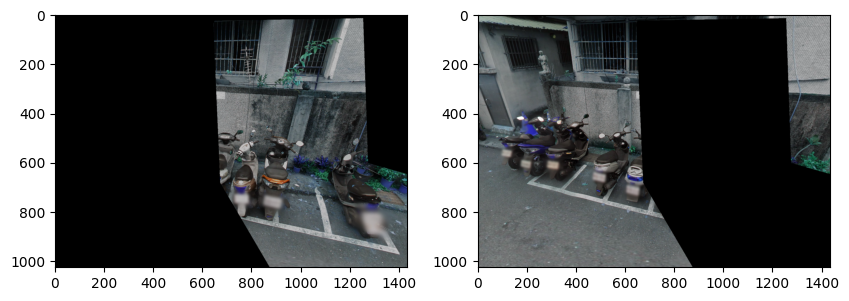

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ultralytics import YOLO
model = YOLO('yolov8l_best.pt')
polygon_points = [(648, 27), (1251, 17), (1271, 604), (1481, 663), (1754, 752), (2231, 906), (2221, 1276), (1011, 1264), (671, 683), (643, 39)]
orig_img = cv2.imread('illegal2.png')
pts = np.array(polygon_points, np.int64)
pts = pts.reshape((-1, 1, 2))
img = orig_img.copy()
mask = np.zeros_like(img) #Create a black image with similar shape as original

cv2.fillPoly(mask, [pts], (255, 255, 255)) #Insert the polygon and fill it with white

park_img = cv2.bitwise_and(img, mask) #Perform intersection of the masked image and the original


illegal_park_img = cv2.fillPoly(img, [pts], (0, 0, 0)) #Insert the polygon and fill it with white
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].imshow(park_img)
ax[1].imshow(illegal_park_img)



In [17]:
results = model(orig_img,save=True, conf=0.4, classes=3)[0]




0: 480x640 (no detections), 429.2ms
Speed: 4.1ms preprocess, 429.2ms inference, 8.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict3



0: 480x640 5 motorcycles, 477.8ms
Speed: 2.6ms preprocess, 477.8ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4


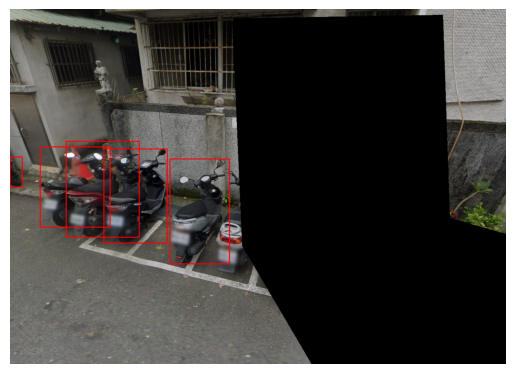

In [18]:
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO

# Load the model and image
model = YOLO('yolov8x.pt')
# img = cv2.imread('illegal1.png')
# Perform inference
results = model(illegal_park_img,save=True, conf=0.4, classes=3)[0]

# Draw bounding boxes with custom color
for detection in results.boxes.xyxy:
  # Extract bounding box coordinates
  x1, y1, x2, y2 = detection
  start_point = (int(x1), int(y1))
  end_point = (int(x2), int(y2))

  # Custom color (e.g., red in BGR)
  color = (0, 0, 255)  # BGR format

  # Draw the rectangle
  boxed_img = cv2.rectangle(illegal_park_img, start_point, end_point, color, 2)

# Convert image to RGB for matplotlib
illegal_img_boxed = cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(illegal_img_boxed)
plt.axis('off')
plt.show()


0: 480x640 4 motorcycles, 589.6ms
Speed: 4.7ms preprocess, 589.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4


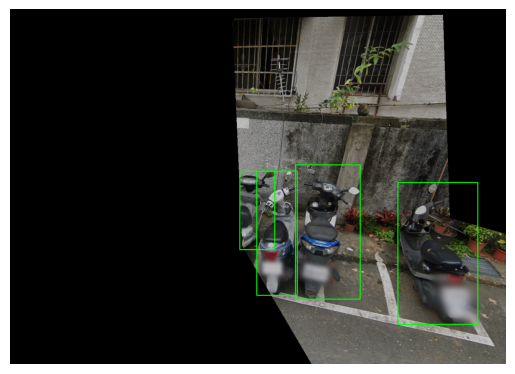

In [19]:
# Perform inference
results = model(park_img,save=True, conf=0.4, classes=3)[0]

# Draw bounding boxes with custom color
for detection in results.boxes.xyxy:
  # Extract bounding box coordinates
  x1, y1, x2, y2 = detection
  start_point = (int(x1), int(y1))
  end_point = (int(x2), int(y2))

  # Custom color (e.g., red in BGR)
  color = (0, 255, 0)  # BGR format

  # Draw the rectangle
  boxed_img = cv2.rectangle(park_img, start_point, end_point, color, 2)

# Convert image to RGB for matplotlib
cv2.imwrite( 'test.jpg', boxed_img)

legal_img_boxed = cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(legal_img_boxed)
plt.axis('off')
plt.show()

In [7]:
combined = cv2.bitwise_or(illegal_img_boxed, legal_img_boxed)
fin_img = cv2.cvtColor(combined, cv2.COLOR_RGB2BGR)

cv2.imwrite('combined1.jpg', fin_img)

True


0: 512x640 2 motorcycles, 569.3ms
Speed: 1.9ms preprocess, 569.3ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict13


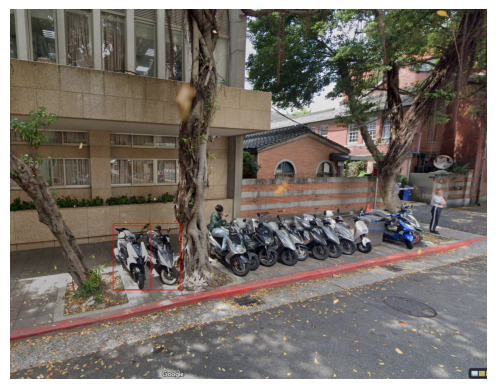

In [60]:
results = model(illegal_park_img,save=True, conf=0.4, classes=3)[0]

# Draw bounding boxes with custom color
for detection in results.boxes.xyxy:
  # Extract bounding box coordinates
  x1, y1, x2, y2 = detection
  start_point = (int(x1), int(y1))
  end_point = (int(x2), int(y2))

  # Custom color (e.g., red in BGR)
  color = (0, 0, 255)  # BGR format

  # Draw the rectangle
  boxed_img = cv2.rectangle(orig_img, start_point, end_point, color, 2)

# Convert image to RGB for matplotlib
cv2.imwrite("ill_boxed.jpg", boxed_img)
illegal_img_boxed = cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(illegal_img_boxed)
plt.axis('off')
plt.show()

# Illegal Parking Green

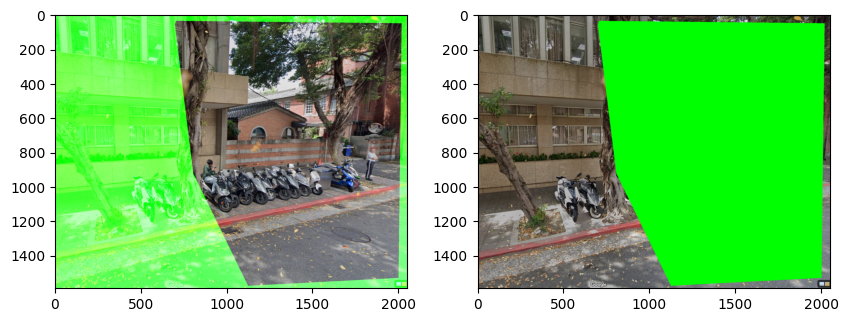

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ultralytics import YOLO
model = YOLO('yolov8x.pt')
polygon_points = [(697, 55), (804, 922), (1017, 1360), (1122, 1576), (1996, 1530), (2014, 48), (704, 34)]
orig_img = cv2.imread('illegal13.jpg')
pts = np.array(polygon_points, np.int64)
pts = pts.reshape((-1, 1, 2))
img = orig_img.copy()


# Create a mask for the polygon area
mask = np.zeros_like(img)  # Create a black image with similar shape as original
mask[:] = (0,255,0)
cv2.fillPoly(mask, [pts], (0, 0, 0))  # Insert the polygon and fill it with white

# Apply the mask to the original image to get only the polygon area
# Invert the mask for the park_img
park_img = cv2.bitwise_or(img, mask)  # Keep the area outside the polygon black

# Create a copy of the original image for the illegal parking visualization
illegal_park_img = img.copy()

# Fill the polygon area with green in the illegal parking image
cv2.fillPoly(illegal_park_img, [pts], (0, 255, 0))  # Fill the polygon with green

# Plot the images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(park_img, cv2.COLOR_BGR2RGB))  # Convert to RGB for accurate color representation
ax[1].imshow(cv2.cvtColor(illegal_park_img, cv2.COLOR_BGR2RGB))
plt.show()




0: 512x640 2 motorcycles, 696.7ms
Speed: 1.7ms preprocess, 696.7ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict13


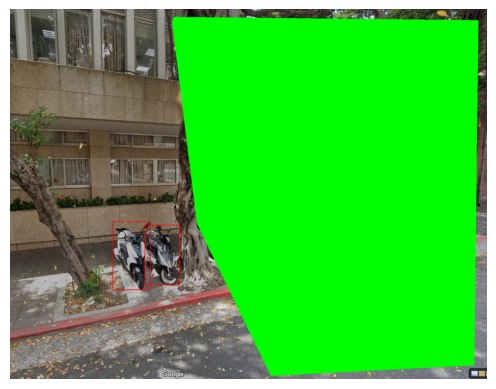

In [57]:

# Load the model and image
# img = cv2.imread('illegal1.png')
# Perform inference
results = model(illegal_park_img,save=True, conf=0.4, classes=3)[0]

# Draw bounding boxes with custom color
for detection in results.boxes.xyxy:
  # Extract bounding box coordinates
  x1, y1, x2, y2 = detection
  start_point = (int(x1), int(y1))
  end_point = (int(x2), int(y2))

  # Custom color (e.g., red in BGR)
  color = (0, 0, 255)  # BGR format

  # Draw the rectangle
  boxed_img = cv2.rectangle(illegal_park_img, start_point, end_point, color, 2)

if len(results.boxes.xyxy) != 0:
  # Convert image to RGB for matplotlib
  illegal_img_boxed = cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)
  # Display the image
  plt.imshow(illegal_img_boxed)
  plt.axis('off')
  plt.show()


0: 512x640 12 motorcycles, 802.5ms
Speed: 6.3ms preprocess, 802.5ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict13


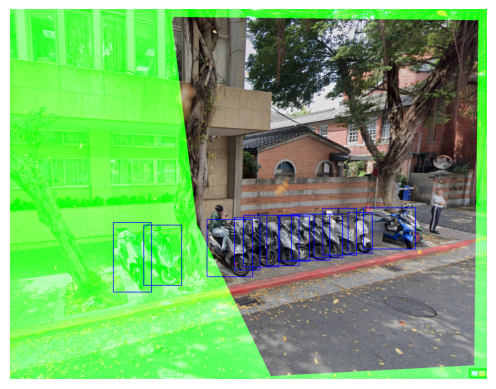

In [58]:
# Perform inference
results = model(park_img,save=True, conf=0.4, classes=3)[0]

# Draw bounding boxes with custom color
for detection in results.boxes.xyxy:
  # Extract bounding box coordinates
  x1, y1, x2, y2 = detection
  start_point = (int(x1), int(y1))
  end_point = (int(x2), int(y2))

  # Custom color (e.g., red in BGR)
  color = (255, 0, 0)  # BGR format

  # Draw the rectangle
  boxed_img = cv2.rectangle(park_img, start_point, end_point, color, 2)

# Convert image to RGB for matplotlib
cv2.imwrite( 'test.jpg', boxed_img)

legal_img_boxed = cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(legal_img_boxed)
plt.axis('off')
plt.show()

In [59]:
combined = cv2.bitwise_or(illegal_img_boxed, legal_img_boxed)
fin_img = cv2.cvtColor(combined, cv2.COLOR_RGB2BGR)

cv2.imwrite('combined1.jpg', fin_img)

True

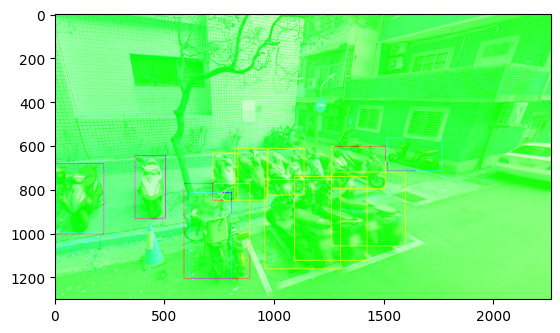

In [28]:
plt.imshow(fin_img)

# Fake RPi Client

In [44]:
import os, random
img_list = os.listdir("./Test/")
file_path = './Test/'

img_name = random.choice(img_list)
path = f'{file_path}{img_name}'
img = cv2.imread(path)
_, encoded_img = cv2.imencode('.jpg', img)


In [42]:
img_name

'mobile01-476db7939fb09a974224d6595f01e284.jpg'